<a href="https://colab.research.google.com/github/i7xmel/AML-Lab-1/blob/main/2348521_AML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Program_1_Dataset.csv')

In [3]:
data.head(5)

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
print(data.columns)

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


In [5]:
X = data['Avg_rooms '].values
Y = data['MValue'].values

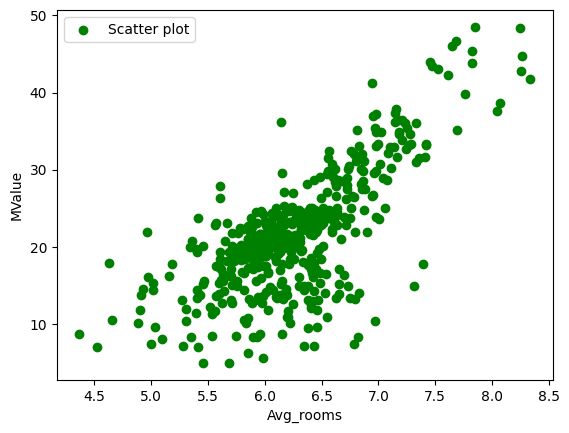

In [13]:
plt.scatter(X, Y, c='green', label='Scatter plot')

plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.legend()
plt.show()

In [7]:
def remove_outliers_z_score(dataframe, columns, threshold_positive=3, threshold_negative=-3):
    for col in columns:
        z_scores = np.abs((dataframe[col] - dataframe[col].mean()) / dataframe[col].std())
        dataframe = dataframe[(z_scores < threshold_positive) & (z_scores > threshold_negative)]
    return dataframe

columns = ['Avg_rooms ', 'MValue']
df_no_outliers = remove_outliers_z_score(data, columns, threshold_positive=3, threshold_negative=-3)

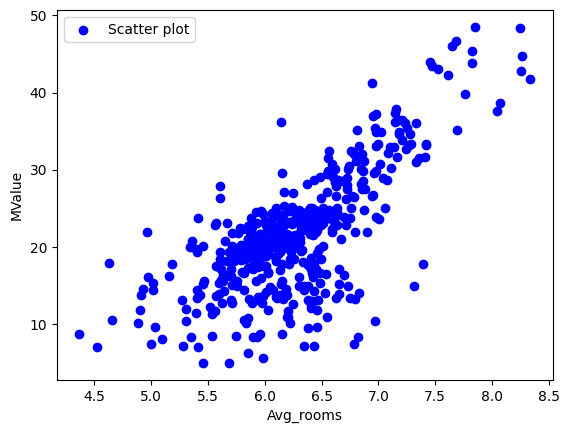

In [14]:
X = df_no_outliers['Avg_rooms '].values
Y = df_no_outliers['MValue'].values
plt.scatter(X, Y, c='blue', label='Scatter plot')

plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')


Coefficient: 9.277759948908907
Intercept: -36.49724422306973


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

Y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

Training Set Metrics:
Mean Squared Error: 30.43594332201146
R-squared: 0.5166954352067943

Testing Set Metrics:
Mean Squared Error: 24.522118696183345
R-squared: 0.5538277014023592
